<a href="https://colab.research.google.com/github/audreychela/Audrey_first_repo/blob/main/data_cleaning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AVIATIONDATA CLEANING WITH PANDAS.**

1.**Overview**


The AviationData dataset contains historical records of aviation accidents and incidents reported from 1962 to 2023. It includes detailed information such as the date and location of the accident, aircraft type, operator, level of damage, number of injuries or fatalities and weather conditions.

The aim of this project is to clean and prepare the dataset for meaningful analysis, with the ultimate goal of uncovering trends, improving safety insights, and guiding aviation stakeholders in decision-making.

**1.1 Objectives**

Understand the structure and content of the AviationData
Identify and handle missing, duplicated, or inconsistent data entries.
Ensure data quality through standardization and type conversion.
To perfom Explolatory Data Analysis to show safety-related insights.
Explore historical trends in aviation accidents
Perform Exploratory Data Analysis (EDA) to draw safety-related insights

**1.3 DATA UNDERSTANDING.**

The dataset includes both structured (e.g., dates, numerical counts) and semi-structured fields (e.g., location descriptions, aircraft type). Initial inspection using commands like df.info(), df.describe(), and df.head() can help assess:

Number and type of columns
Number of records (rows)
Presence of null/missing values
Data types such as; object, int, float
Ranges for date and numerical values

1. **IMPORTING RELEVANT LIBRARIES.**

Import the pandas library using the standard alias pd.


In [3]:
# Importing the required libraries with the standard alias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. **Loading Data into a DataFrame Called AviationData.csv and getting information**

The file path is AviationData.csv. I will use pandas to read in the data from this CSV file and create a dataframe named df.

In [4]:
#loading dataset and assigning it as df
df = pd.read_csv('AviationData.csv', encoding = 'latin1')
print(df.dtypes)

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

/tmp/ipython-input-4-1793532897.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding = 'latin1')


In [5]:
#displaying the first rows of the DataFrame
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
#displaying the last rows in the DataFrame
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
#checking the dataset shape
df.shape

(88889, 31)

In [8]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [9]:
#checking the info 2
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


In [10]:
#checking the consise statistics summary
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [11]:
#Describing the categorical features
df.describe(include="O").T

,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,WPR23LA045,2
Event.Date,88889,14782,1982-05-16,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50132,10374,NONE,1488
Airport.Name,52704,24870,Private,240



**2.DATA CLEANING.**

 Data cleaning Includes:

1. Checking the columns and changing mispelled to correct names
2. Checking missing values
3. Checking for duplicates
4. Checking for outliers

**2.1. Checking the columns and dealing with mispelled columns**

In [12]:
#checking columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [13]:
#removing the upper cases on the make column and extra spaces
df['Make'] = df['Make'].str.lower().str.strip()
df['Make']

,Make
0,stinson
1,piper
2,cessna
3,rockwell
4,cessna
...,...
88884,piper
88885,bellanca
88886,american champion aircraft
88887,cessna


In [14]:
#dealing with weather condition columns by removing the upper case and spaces
df['Weather.Condition'] = df['Weather.Condition'].str.lower().str.strip()
df['Weather.Condition']

,Weather.Condition
0,unk
1,unk
2,imc
3,imc
4,vmc
...,...
88884,NaN
88885,NaN
88886,vmc
88887,NaN


In [15]:
#Changing column names to lower case for unifromity

df_columns = df.columns.str.lower()
df_columns

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')

In [16]:
#checking on the correct column names
df_columns = df_columns.str.strip().str.lower().str.replace(' ', '_')
df_columns

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')

In [17]:
#checking on the missing value
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


In [18]:
#dropping missing values on location variable
df = df.dropna(subset=['Location'])
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,unk,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,unk,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,imc,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,imc,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,vmc,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,vmc,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [19]:
df = df.dropna(subset=['Event.Id'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,unk,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,unk,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,imc,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,imc,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,vmc,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,vmc,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [20]:
#filling null values by imputing with the mode

df["Total.Uninjured"].fillna("mode", inplace=True)
df.isna().sum()

/tmp/ipython-input-20-222073300.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total.Uninjured"].fillna("mode", inplace=True)
/tmp/ipython-input-20-222073300.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'mode' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["Total.Uninjured"].fillna("mode", inplace=True)


,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,0
Country,225
Latitude,54460
Longitude,54469
Airport.Code,38707
Airport.Name,36135


In [21]:
#filling null values by imputing with the mode
df["Country"].fillna("mode", inplace=True)
df.isna().sum()

/tmp/ipython-input-21-1519321088.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Country"].fillna("mode", inplace=True)


,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Latitude,54460
Longitude,54469
Airport.Code,38707
Airport.Name,36135


In [22]:
#checking on the unique values
df.nunique()

,0
Event.Id,87899
Investigation.Type,2
Accident.Number,88811
Event.Date,14782
Location,27758
Country,217
Latitude,25587
Longitude,27153
Airport.Code,10374
Airport.Name,24868


In [23]:
#checking on unique values in Injury.SEverity
df['Injury.Severity'].value_counts()

#1st lets remove spaces and capitalise the first letters using .title() method
df['Injury.Severity'] = df['Injury.Severity'].str.strip().str.title()

# Replace similar values using replace'', '_'
df['Injury.Severity'] = df['Injury.Severity'].replace({
    'Fatal(1)': 'Fatal',
    'Fatal(2)': 'Fatal',
    'Fatal(3)': 'Fatal',
    'NaN': 'Unknown',})
df['Injury.Severity']

#keep the main catgories by filtering
top_values = ['Fatal', 'Non-Fatal', 'Minor']
df = df[df['Injury.Severity'].isin(top_values)]
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,unk,Cruise,Probable Cause,NaN
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,mode,imc,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,imc,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,vmc,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,vmc,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,vmc,NaN,NaN,27-12-2022


2.2 **Checking Duplicates**

In [24]:
#checking duplicates
df.duplicated()

,0
0,False
2,False
3,False
4,False
5,False
...,...
88882,False
88883,False
88884,False
88886,False


In [25]:
df[df.duplicated(subset='Injury.Severity')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,mode,imc,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,imc,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,vmc,Approach,Probable Cause,16-04-1980
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,vmc,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,imc,Landing,Probable Cause,01-01-1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,vmc,NaN,NaN,27-12-2022


2.3 **Checking Outliers**


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: ylabel='Total.Fatal.Injuries'>

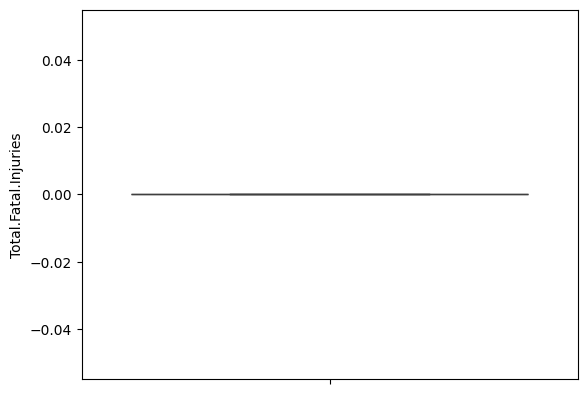

In [27]:
#removing outlier using iqr
#Calculate the interquartile range (IQR)
q1 = df['Total.Fatal.Injuries'].quantile(0.25)
q3 = df['Total.Fatal.Injuries'].quantile(0.75)
iqr = q3 - q1

# Definining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


#Filtering data to remove outliers
df = df[(df['Total.Fatal.Injuries'] >= lower_bound) & (df['Total.Fatal.Injuries'] <= upper_bound)]
df

sns.boxplot(y='Total.Fatal.Injuries', data=df)

Observations: thr outlier is removed; therefore showing a clear picture of the total fatal injuries.

In [28]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,vmc,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,imc,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,imc,Cruise,Probable Cause,01-01-1982
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,vmc,Approach,Probable Cause,01-01-1982
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,NaN,NaN,TUSKEGEE,...,Personal,NaN,0.0,0.0,0.0,1.0,vmc,Landing,Probable Cause,01-01-1982


2.4 **Changing data types**

In [29]:
#changing dtype to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event.Date']
#df.loc[:, ('Event.Date')]

/tmp/ipython-input-29-1924074646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event.Date'] = pd.to_datetime(df['Event.Date'])


,Event.Date
7,1982-01-01
8,1982-01-01
9,1982-01-01
10,1982-01-01
11,1982-01-01
...,...
88881,2022-12-21
88882,2022-12-21
88884,2022-12-26
88886,2022-12-26


In [30]:
#another way to do the above
#using .loc to get event date Values
df.loc[:, ('Event.Date')]

,Event.Date
7,1982-01-01
8,1982-01-01
9,1982-01-01
10,1982-01-01
11,1982-01-01
...,...
88881,2022-12-21
88882,2022-12-21
88884,2022-12-26
88886,2022-12-26


2.5 **Saving Dataset**

In [31]:
#save the new dataframe in csv format
df.to_csv('aviation_data.csv', index=False)

**EXPLORATORY DATA ANALYSIS.(EDA)**

Exploratory Data Analysis (EDA) is the process of examining and understanding a dataset before doing any modeling or formal statistical analysis. It helps you discover patterns, spot anomalies, test assumptions, and check the quality of your data.

EDA involves:
1. Data cleaning: checking for missing values, detecting outliers,
Finding data types and converting if necessary.

2. Looking at summary statistics (mean, median, std, etc.).

3. Exploring distributions of numeric variables (histograms, boxplots).

4. Exploring relationships between variables (scatter plots, correlation heatmaps).


In [32]:
#load the clean Dataset and create a adataframe
data = pd.read_csv('aviation_data.csv')
data.head()

/tmp/ipython-input-32-655618897.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('aviation_data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,vmc,Takeoff,Probable Cause,01-01-1982
1,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,imc,Landing,Probable Cause,01-01-1982
2,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,imc,Cruise,Probable Cause,01-01-1982
3,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,vmc,Approach,Probable Cause,01-01-1982
4,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,NaN,NaN,TUSKEGEE,...,Personal,NaN,0.0,0.0,0.0,1.0,vmc,Landing,Probable Cause,01-01-1982


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56924 entries, 7 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                56924 non-null  object        
 1   Investigation.Type      56924 non-null  object        
 2   Accident.Number         56924 non-null  object        
 3   Event.Date              56924 non-null  datetime64[ns]
 4   Location                56924 non-null  object        
 5   Country                 56924 non-null  object        
 6   Latitude                17634 non-null  object        
 7   Longitude               17635 non-null  object        
 8   Airport.Code            34554 non-null  object        
 9   Airport.Name            36636 non-null  object        
 10  Injury.Severity         56924 non-null  object        
 11  Aircraft.damage         55525 non-null  object        
 12  Aircraft.Category       21224 non-null  object     

**1. Univariate analysis**


Univariate Analysis is a type of data visualization where we visualize only a single variable at a time. It helps us analyze the distribution of the variable present in the data for further analysis.
Univariate analysis techniques includes:
1. Count plot: This shows the number of times each unique value occurs in a variable.
2. Histogram: Performs analysis on Numerical variables.
3. Boxplot: This shows the median, quartiles, and outliers of a variable.
4. Stem-and-leaf plot: This is a graphical representation of the data that shows the individual values and their distribution.

Univariate analysis can be used to answer a variety of questions about a variable, such as:
1. What values exist in the variable?
2. How often do they occur?
3. What is the shape of the data?
4. Are there errors, missing data, or outliers?

In [35]:
#checking on the categorical features

data.describe(include='object')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,56924,56924,56924,56924,56924,56924,17634,17635,34554,36636,...,53922,21178,7509,54540,11878,56924,55215,37904,53820,46560
unique,56492,2,56913,11970,19207,161,13084,13820,8592,18960,...,10,25,3,25,10084,334,3,12,14151,1635
top,20001212X19172,Accident,ERA22LA119,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,PRIVATE,...,Reciprocating,091,UNK,Personal,Pilot,1.0,vmc,Landing,Probable Cause,25-09-2020
freq,3,55944,2,24,317,54839,17,22,1126,198,...,47231,14800,3387,32579,203,20783,52916,11266,37923,13344


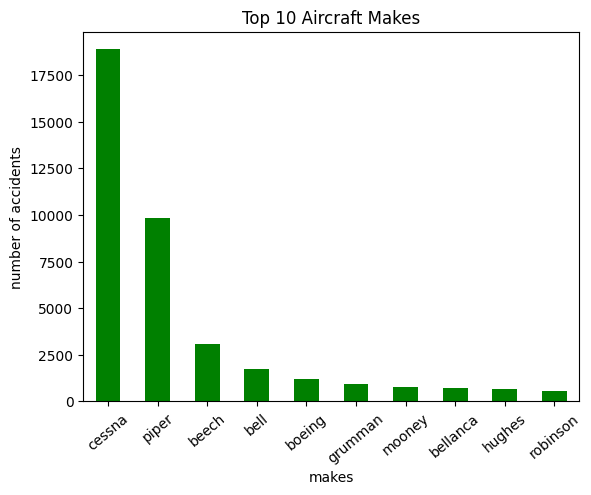

In [36]:
#doing univariate analysis on make variable using bar plot
data['Make'].value_counts().head(10).plot(kind='bar', color="g")
plt.title('Top 10 Aircraft Makes')
plt.ylabel('number of accidents')
plt.xlabel('makes')
plt.xticks(rotation=40)
plt.show()

Observations: cessna has the highest number of incidents showing that its often reported to be involved in accidents while at the lower end hughes has the least number of incidents showing that it is not prone to accidents.

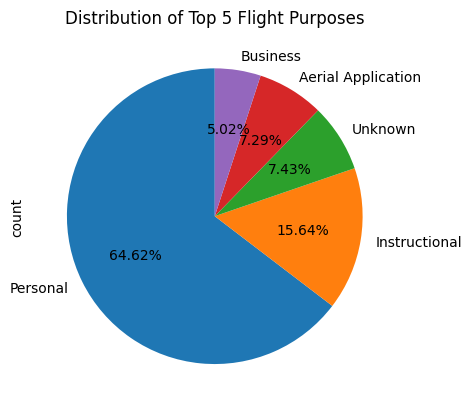

In [60]:
# a pie chart of univariate analysis of  distribution of top 5 purpose.of.flight variable
data['Purpose.of.flight'].value_counts().head(5).plot(kind='pie', autopct='%1.2f%%', startangle=90);
plt.title('Distribution of Top 5 Flight Purposes')

plt.show()

Observations: The chart above shows different purposes for flights involved in accidents.
Personal has the largest number which shows that most accidents involve personal flights.Instructional are associated with learners,which shows that these are training flights .
Unkown shows accidents that happened with no clear records.
Aerial Application and business has the smallest numbers which are mostly regulated and operated hence causing fewer accidents.


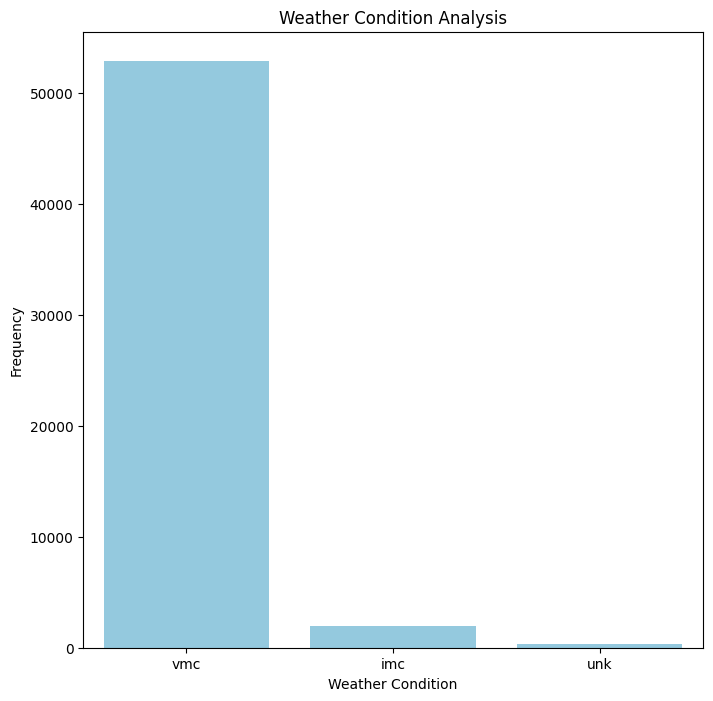

In [38]:
#weather condition analysis using barchart showing frequency in which the accidents happend due to weather conditions

data['Weather.Condition'].value_counts()
plt.figure(figsize=(8,8))
sns.countplot(data, x='Weather.Condition', color='skyblue')
plt.title('Weather Condition Analysis')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()

Observations:This bar chart shows that Visual Meteorological Conditions(vmc) is the dominant weather condition, occurring with a frequency higher than any other. Instrument Meteorological Conditions (imc")conditions are present but  less common, while (unk) conditions are almost negligible. This distribution indicates that vmc represents majority of observations concerning weather condition.

In [39]:
#checking on the numerical variables
data.select_dtypes(include='number')

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,1.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0
2,1.0,0.0,0.0,3.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
56919,NaN,0.0,1.0,0.0
56920,NaN,0.0,1.0,0.0
56921,NaN,0.0,1.0,0.0
56922,1.0,0.0,0.0,0.0


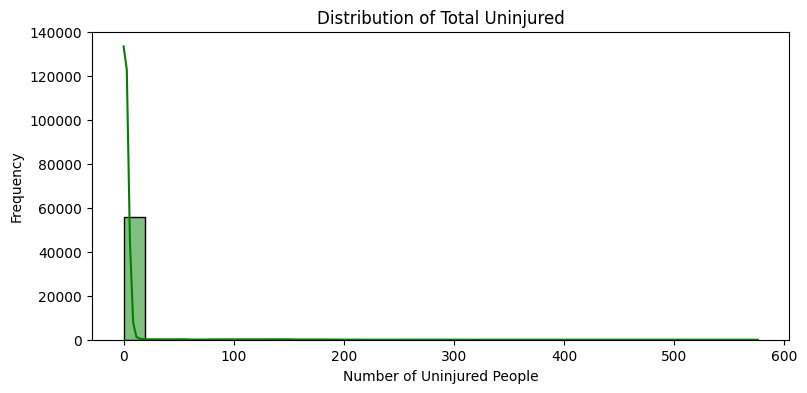

In [40]:
#using histogram for univariate analysis on Total uninjured variable
#doing univariate analysis on numerical variables on total uinjured

#first convert to numerical values
data['Total.Uninjured'] = pd.to_numeric(data['Total.Uninjured'], errors='coerce')
#get the summary statistics
data['Total.Uninjured'].describe()
plt.figure(figsize=(9,4))
sns.histplot(data['Total.Uninjured'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Total Uninjured')
plt.xlabel('Number of Uninjured People')
plt.ylabel('Frequency')
plt.show()

Observations: This histogram shows that most accidents involve a very small number of uninjured people. The frequency drastically decreases as the number of uninjured people rises, indicating that situations with many uninjured individuals are extremely rare. The distribution is heavily concentrated at the lower end of the uninjured count.

**2. Bivariate Analysis**

Bivariate analysis is a statistical technique used to describe and summarize the relationship between two variables. It is often used as a preliminary step in data analysis to identify patterns, trends, and correlations.
bivariate analysis techniques include:
1. **Scatter plots**: Excellent for visualizing the relationship between two variables and spotting patterns.
2. **Correlation coefficients**: Provide a numerical measure of the strength and direction of the linear relationship.
3. **Linear Regression**: Used to model the linear relationship and predict values of one variable based on the other.

Bivariate analysis can be used to answer a variety of questions about the relationship between two variables, such as:

1. What equation best describes the relationship between the variables?
2. Can changes in one variable be used to predict changes in the other?

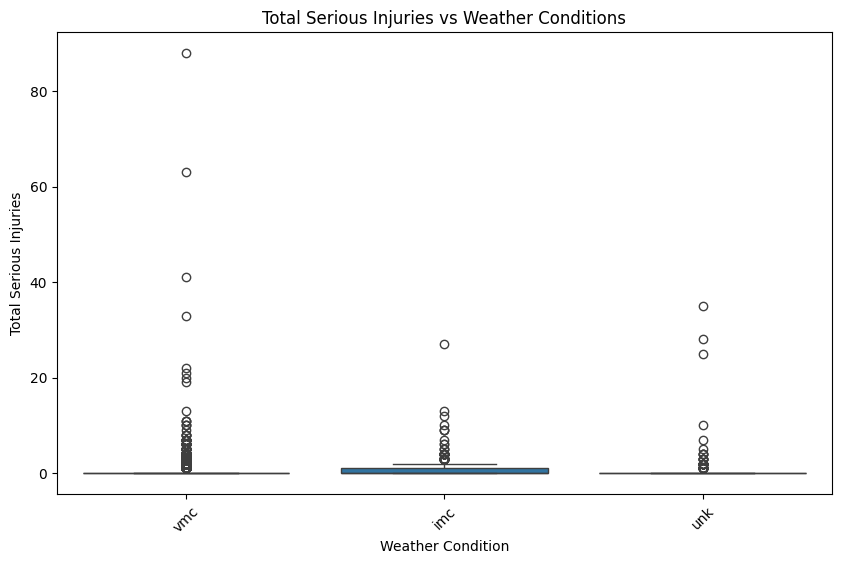

In [61]:
#bivariate analysis using scatterplot on  weather condition vs total serious injuries variables
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='Weather.Condition', y='Total.Serious.Injuries')
plt.title('Total Serious Injuries vs Weather Conditions')
plt.xticks(rotation=45)
plt.ylabel('Total Serious Injuries')
plt.xlabel('Weather Condition')
#plt.tight_layout()
plt.show()

Observations: This scatter plot illustrates total serious injuries across various weather conditions. For vmc conditions, most accidents result in very few injuries, but there are outliers with high injury counts. imc and unk conditions similarly show most accidents with low injuries, though their highest injury counts are considerably lower than vmc.

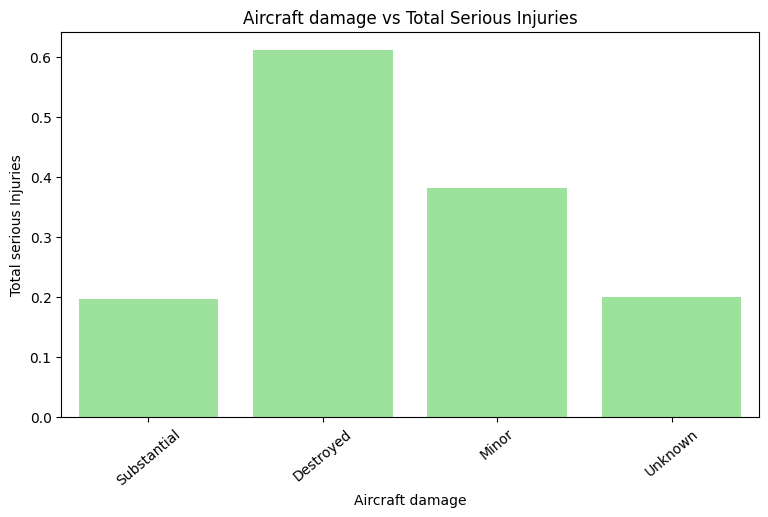

In [56]:
#bar plot showing analysis between aircraft damage vs total serious injuries
plt.figure(figsize=(9, 5))
sns.barplot(x='Aircraft.damage', y='Total.Serious.Injuries', data=data, errorbar=None, color='lightgreen') #, palette='coolwarm')
plt.title("Aircraft damage vs Total Serious Injuries")
plt.xlabel("Aircraft damage")
plt.ylabel("Total serious Injuries")
plt.xticks(rotation=40)
plt.show()

Observations: This bar chart illustrates a clear relationship between aircraft damage and total serious injuries. Destroyed aircraft accidents show the highest proportion of serious injuries, with around 0.6. Minor damage also correlates with a significant level of injuries, while substantial and unknown damage types have a lower comparable proportion of serious injuries

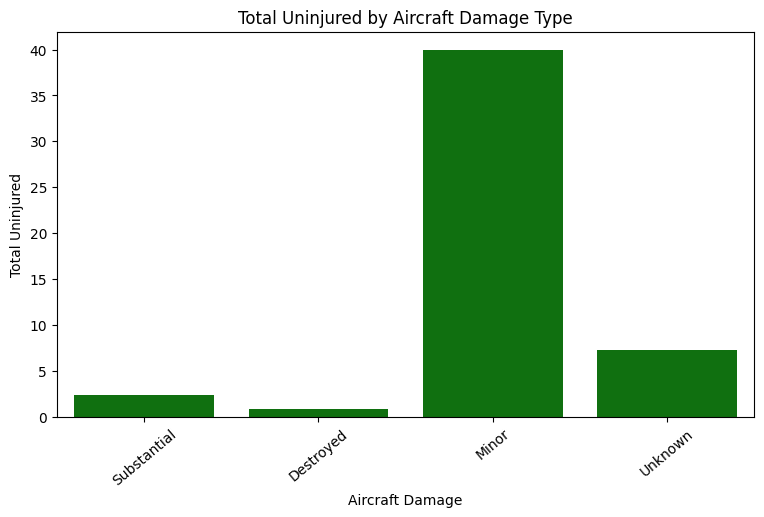

In [59]:
#bar plot showing analysis between aircraft damage vs total uninjured
plt.figure(figsize=(9, 5))
sns.barplot(x='Aircraft.damage', y='Total.Uninjured', data=data, errorbar=None, color='g')
plt.title("Total Uninjured by Aircraft Damage Type")
plt.xlabel("Aircraft Damage")
plt.ylabel("Total Uninjured")
plt.xticks(rotation=40)
plt.show()

Observations: this shows that minor damage has the highest number of uninjured people.This suggests that when aircraft damage is minor, most or all passengers tend to survive without injuries.
Destroyed aircraft has the lowest number of uninjured people which leads to fewer survivors.Substantial and unknown has the least number of uninjured number of people.

3.**Multivariate Analysis**


Multivariate Analysis- is the statistical examination of more than two variables at the same time to understand their relationships, influences, or combined effects on each other.
Multivariate techniques include:
1. **Multivariate Regression**:Predict a numerical outcome using several variables
2. **Factor analysis**: Reduce many features into fewer components
3. **Cluster analysis**: Group similar records based on many features

Multivariate analysis can be used to answer a variety of questions about the relationship between three or more variables, such as:

1. What combination of factors best predicts an outcome?
2. How do multiple variables together influence a specific result?
3. Does the effect of one variable change depending on another?
4. Are there patterns or groups formed when we consider several features at once?
5. Which variables are most important in explaining variation in the data?
6. How do changes in multiple inputs impact the output variable?